In [1]:
import ee
import geemap
import geopandas as gpd

In [2]:
geemap.ee_initialize()


<Axes: >

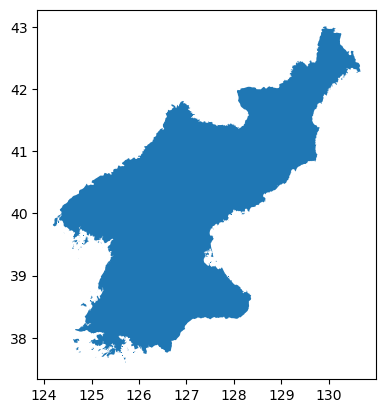

In [9]:
nk_gdf=gpd.read_file('/Users/gigisung/gigi_git/undatathon/helperfile/nk_national_boundary.json')
nk_gdf.plot()

In [27]:
Map = geemap.Map()
dataset = ee.ImageCollection("ESA/WorldCover/v100").first()
Map.addLayer(dataset, {'bands': ['Map']}, 'ESA Land Cover')
# ee_object = geemap.geopandas_to_ee(nk_gdf)
# Map.addLayer(ee_object, {}, 'South Korea Boundary')
Map.add_legend(builtin_legend='ESA_WorldCover')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [31]:
# Define the coordinates for the polygon
coordinates = [
    [129.696351, 42.407487],
    [129.696351, 42.450693],
    [129.797631, 42.450693],
    [129.797631, 42.407487],
    [129.696351, 42.407487]
]

# Create the polygon object
polygon = ee.Geometry.Polygon(coordinates, proj='EPSG:4326', geodesic=False)
Map.addLayer(polygon, {}, 'hoerong')
Map


Map(bottom=6402.0, center=[41.672911819602085, 126.90307617187501], controls=(WidgetControl(options=['position…

## Clip and Download

In [29]:
# Get the bounding box of the GeoDataFrame
bbox = nk_gdf.total_bounds

# Create an Earth Engine geometry from the bounding box
ee_bbox = ee.Geometry.Rectangle([bbox[0], bbox[1], bbox[2], bbox[3]])

# Add the bounding box to the map
Map.addLayer(ee_bbox, {}, 'Bounding Box')

# Clip the image to the bounding box
clipped_image = dataset.clip(ee_bbox)

# Add the clipped image to the map
Map.addLayer(clipped_image, {'bands': ['Map']}, 'Clipped ESA Land Cover')

Map


Map(bottom=812.0, center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Search…

In [32]:
Map.centerObject(ee_bbox)
Map

Map(bottom=6402.0, center=[41.672911819602085, 126.90307617187501], controls=(WidgetControl(options=['position…

In [33]:
features = geemap.fishnet(ee_bbox, rows=5, cols=5)
Map.addLayer(features, {}, 'Grids')

In [35]:
geemap.download_ee_image_tiles(
    dataset, features, '/Users/gigisung/gigi_git/undatathon/nk_nationtal/tiles', prefix="landsat_", crs="EPSG:5186", scale=30
)

landsat_01.tif: |          | 0.00/16.0M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_02.tif: |          | 0.00/15.6M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_03.tif: |          | 0.00/15.5M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_04.tif: |          | 0.00/15.9M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_05.tif: |          | 0.00/16.3M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_06.tif: |          | 0.00/16.8M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_07.tif: |          | 0.00/15.8M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_08.tif: |          | 0.00/15.4M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_09.tif: |          | 0.00/15.3M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_10.tif: |          | 0.00/15.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_11.tif: |          | 0.00/16.1M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_12.tif: |          | 0.00/16.6M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_13.tif: |          | 0.00/15.6M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_14.tif: |          | 0.00/15.1M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_15.tif: |          | 0.00/15.0M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_16.tif: |          | 0.00/15.4M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_17.tif: |          | 0.00/15.9M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_18.tif: |          | 0.00/16.4M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_19.tif: |          | 0.00/15.4M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_20.tif: |          | 0.00/14.9M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_21.tif: |          | 0.00/14.8M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_22.tif: |          | 0.00/15.2M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_23.tif: |          | 0.00/15.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_24.tif: |          | 0.00/16.1M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_25.tif: |          | 0.00/15.1M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_26.tif: |          | 0.00/14.7M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_27.tif: |          | 0.00/14.6M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_28.tif: |          | 0.00/15.0M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_29.tif: |          | 0.00/15.4M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_30.tif: |          | 0.00/15.9M (raw) [  0.0%] in 00:00 (eta:     ?)

landsat_31.tif: |          | 0.00/14.3M (raw) [  0.0%] in 00:00 (eta:     ?)

Downloaded 31 tiles in 475.74596190452576 seconds.


## Merge

In [ ]:
import rasterio
from rasterio.merge import merge
import glob
import os

# Get a list of all the tile files
search_criteria = "/Users/gigisung/gigi_git/undatathon/nk_nationtal/tiles/*.tif"
tile_files = glob.glob(search_criteria)

# Open the tile files and add them to a list
src_files_to_mosaic = [rasterio.open(fp) for fp in tile_files]

# Merge the tile files
mosaic, out_trans = merge(src_files_to_mosaic)

# Write the merged file to disk
out_meta = src_files_to_mosaic[0].meta.copy()
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                 "transform": out_trans,
                 "crs": src_files_to_mosaic[0].crs
                 }
                )

out_fp = "/Users/gigisung/gigi_git/undatathon/nk_nationtal/nk_national_merged.tif"
with rasterio.open(out_fp, "w", **out_meta) as dest:
    dest.write(mosaic)
